## Clusterizacion no supervisada para identificar al grupo crediticio de hipotecas menos favorecido 

### Carga de Librerias  

In [1]:
import pandas as pd
from os import chdir, getcwd
import os
import numpy as np
%matplotlib inline
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


### Lectura de Archivo 

In [2]:
wd=getcwd()
chdir(wd)
csv_dir = os.path.join(wd, 'Conavi','202012.csv')
print(csv_dir)
df_conavi2020= pd.read_csv(csv_dir,  encoding='latin-1')

D:\backup\Analytics\ProjectoDataMexico\Conavi\202012.csv


In [3]:
df_conavi2020.head()

,Año,Mes acumulado,Clave Entidad INEGI,Entidad Federativa,Clave Municipio INEGI,Municipio,Organismo,Modalidad,Destino del Credito,Tipo de Credito,Genero,Rango de Edad,Rango de Ingresos UMA,Rango Valor de la Vivienda UMA,Acciones,Monto
0,2020,1,17,Morelos,18,Temixco,BANCA (CNBV),Mejoramientos,Mejoramientos,Credito individual,Hombre,29 o menos,2.6 o menos,Económica,1,"17,209.00"
1,2020,1,4,Campeche,3,Carmen,BANCA (CNBV),Mejoramientos,Mejoramientos,Credito individual,Hombre,30 a 59,4.01 a 6.00,Económica,3,"158,963.00"
2,2020,1,9,Ciudad de México,2,Azcapotzalco,BANCA (CNBV),Mejoramientos,Mejoramientos,Credito individual,Hombre,29 o menos,2.6 o menos,Económica,1,"19,516.00"
3,2020,1,13,Hidalgo,51,Mineral de la Reforma,BANCA (CNBV),Mejoramientos,Mejoramientos,Credito individual,Hombre,30 a 59,4.01 a 6.00,Económica,1,"57,534.00"
4,2020,1,2,Baja California,4,Tijuana,BANCA (CNBV),Mejoramientos,Mejoramientos,Credito individual,Mujer,30 a 59,2.61 a 4.00,Económica,7,"340,331.00"


In [4]:
df_conavi2020.isnull().sum(axis = 0)
df_conavi2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 355377 entries, 0 to 355376
Data columns (total 16 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   Año                             355377 non-null  int64 
 1   Mes acumulado                   355377 non-null  int64 
 2   Clave Entidad INEGI             355377 non-null  int64 
 3   Entidad Federativa              355377 non-null  object
 4   Clave Municipio INEGI           355377 non-null  int64 
 5   Municipio                       355377 non-null  object
 6   Organismo                       355377 non-null  object
 7   Modalidad                       355377 non-null  object
 8   Destino del Credito             355377 non-null  object
 9   Tipo de Credito                 355377 non-null  object
 10  Genero                          355377 non-null  object
 11  Rango de Edad                   355377 non-null  object
 12  Rango de Ingresos UMA         

### Cambio de tipo de campos y codificacion. 

In [5]:
df_conavi2020["Organismo"] = df_conavi2020["Organismo"].astype('category')
df_conavi2020["Modalidad"]=df_conavi2020["Modalidad"].astype('category')
df_conavi2020["Destino del Credito"]=df_conavi2020["Destino del Credito"].astype('category')
df_conavi2020["Tipo de Credito"]=df_conavi2020["Tipo de Credito"].astype('category')
df_conavi2020=df_conavi2020[df_conavi2020["Genero"]!='No disponible']
print(df_conavi2020["Genero"])
df_conavi2020["Genero"]=df_conavi2020["Genero"].astype('category')
df_conavi2020["Rango de Edad"]=df_conavi2020["Rango de Edad"].astype('category')
df_conavi2020["Rango de Ingresos UMA"]=df_conavi2020["Rango de Ingresos UMA"].astype('category')
df_conavi2020["Rango Valor de la Vivienda UMA"]=df_conavi2020["Rango Valor de la Vivienda UMA"].astype('category')

0         Hombre
1         Hombre
2         Hombre
3         Hombre
4          Mujer
           ...  
355372    Hombre
355373     Mujer
355374    Hombre
355375    Hombre
355376     Mujer
Name: Genero, Length: 352689, dtype: object


In [6]:
df_conavi2020["Organismo_cat"] = df_conavi2020["Organismo"].cat.codes
df_conavi2020["Modalidad_cat"] = df_conavi2020["Modalidad"].cat.codes
df_conavi2020["Destino del Credito_cat"] = df_conavi2020["Destino del Credito"].cat.codes
df_conavi2020["Tipo de Credito_cat"] = df_conavi2020["Tipo de Credito"].cat.codes
df_conavi2020["Genero_cat"] = df_conavi2020["Genero"].cat.codes
df_conavi2020["Rango de Edad_cat"] = df_conavi2020["Rango de Edad"].cat.codes
df_conavi2020["Rango de Ingresos UMA_cat"] = df_conavi2020["Rango de Ingresos UMA"].cat.codes
df_conavi2020["Rango Valor de la Vivienda UMA_cat"] = df_conavi2020["Rango Valor de la Vivienda UMA"].cat.codes
df_conavi2020[['Genero','Genero_cat']].head()
df_conavi2020['Genero'].unique()

[Hombre, Mujer]
Categories (2, object): [Hombre, Mujer]

In [7]:
print(df_conavi2020['Modalidad'].unique())

[Mejoramientos, Otros programas, Viviendas usadas, Viviendas nuevas]
Categories (4, object): [Mejoramientos, Otros programas, Viviendas usadas, Viviendas nuevas]


In [8]:
df_conavi2020.describe()

,Año,Mes acumulado,Clave Entidad INEGI,Clave Municipio INEGI,Acciones,Organismo_cat,Modalidad_cat,Destino del Credito_cat,Tipo de Credito_cat,Genero_cat,Rango de Edad_cat,Rango de Ingresos UMA_cat,Rango Valor de la Vivienda UMA_cat
count,352689.0,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000
mean,2020.0,6.948155,16.611882,43.762213,2.627210,4.049242,1.600376,9.709767,0.612429,0.433526,0.813374,2.271029,2.820868
std,0.0,3.511483,8.368972,53.473621,8.987055,2.850596,1.202792,2.432614,0.487196,0.495562,0.557254,1.764381,2.073843
min,2020.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.0,4.000000,10.000000,11.000000,1.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2020.0,7.000000,15.000000,28.000000,1.000000,6.000000,2.000000,11.000000,1.000000,0.000000,1.000000,2.000000,2.000000
75%,2020.0,10.000000,23.000000,56.000000,2.000000,6.000000,3.000000,12.000000,1.000000,1.000000,1.000000,4.000000,5.000000
max,2020.0,12.000000,32.000000,570.000000,989.000000,8.000000,3.000000,12.000000,1.000000,1.000000,3.000000,6.000000,6.000000


In [9]:
#df_conavi2019['Monto']=df_conavi2019['Monto'].str.replace(',','')
df_conavi2020['Monto']=df_conavi2020['Monto'].str.replace(',','')
#df_conavi2019['Monto']=df_conavi2019['Monto'].astype(float)
df_conavi2020['Monto']=df_conavi2020['Monto'].astype(float)
rm_columns=['Año', 'Mes acumulado', 'Entidad Federativa','Municipio','Organismo','Modalidad','Destino del Credito','Tipo de Credito','Genero','Rango de Edad','Rango de Ingresos UMA','Rango Valor de la Vivienda UMA']
obj_columns=['Rango de Ingresos UMA_cat','Rango de Edad_cat','Genero_cat','Destino del Credito_cat','Tipo de Credito_cat','Monto','Organismo_cat']
conavi_columns = [col for col in df_conavi2020.columns.values if col not in rm_columns]

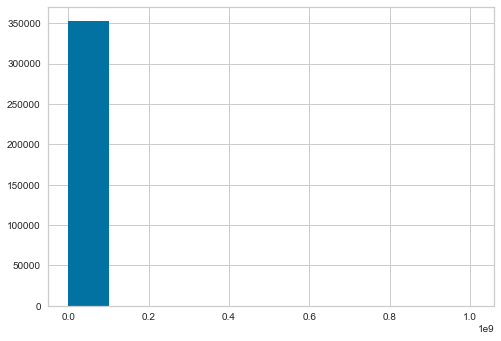

In [10]:
df_conavi2020['Monto'].hist()

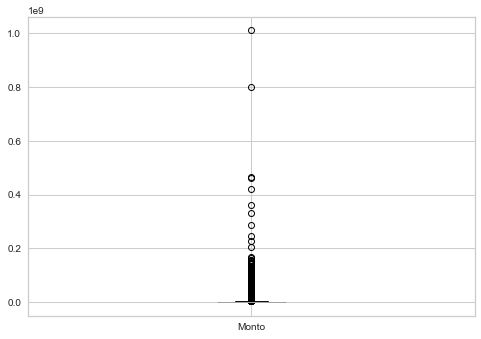

In [11]:
 df_conavi2020.boxplot(column=['Monto'])

### Kmeans clusterization 

In [12]:
kmeans = KMeans(random_state=1000)
kmeans_scaled=KMeans(random_state=1000)

In [13]:
df_conavi2020[obj_columns].corr()

,Rango de Ingresos UMA_cat,Rango de Edad_cat,Genero_cat,Destino del Credito_cat,Tipo de Credito_cat,Monto,Organismo_cat
Rango de Ingresos UMA_cat,1.000000,0.162791,-0.044453,0.140669,-0.007090,0.156587,-0.214928
Rango de Edad_cat,0.162791,1.000000,0.017589,-0.035211,-0.056890,0.016445,-0.098453
Genero_cat,-0.044453,0.017589,1.000000,0.012488,0.095589,-0.001472,0.001828
Destino del Credito_cat,0.140669,-0.035211,0.012488,1.000000,0.248353,0.105186,0.036551
Tipo de Credito_cat,-0.007090,-0.056890,0.095589,0.248353,1.000000,0.113910,0.119831
Monto,0.156587,0.016445,-0.001472,0.105186,0.113910,1.000000,-0.125293
Organismo_cat,-0.214928,-0.098453,0.001828,0.036551,0.119831,-0.125293,1.000000


In [14]:
df_conavi2020[obj_columns].describe()

,Rango de Ingresos UMA_cat,Rango de Edad_cat,Genero_cat,Destino del Credito_cat,Tipo de Credito_cat,Monto,Organismo_cat
count,352689.000000,352689.000000,352689.000000,352689.000000,352689.000000,3.526890e+05,352689.000000
mean,2.271029,0.813374,0.433526,9.709767,0.612429,1.136423e+06,4.049242
std,1.764381,0.557254,0.495562,2.432614,0.487196,4.218318e+06,2.850596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,1.000000,0.000000,0.000000,7.000000,0.000000,5.753400e+04,0.000000
50%,2.000000,1.000000,0.000000,11.000000,1.000000,5.000000e+05,6.000000
75%,4.000000,1.000000,1.000000,12.000000,1.000000,1.126795e+06,6.000000
max,6.000000,3.000000,1.000000,12.000000,1.000000,1.010380e+09,8.000000


### Graficas para verificar que no hay correlacion 

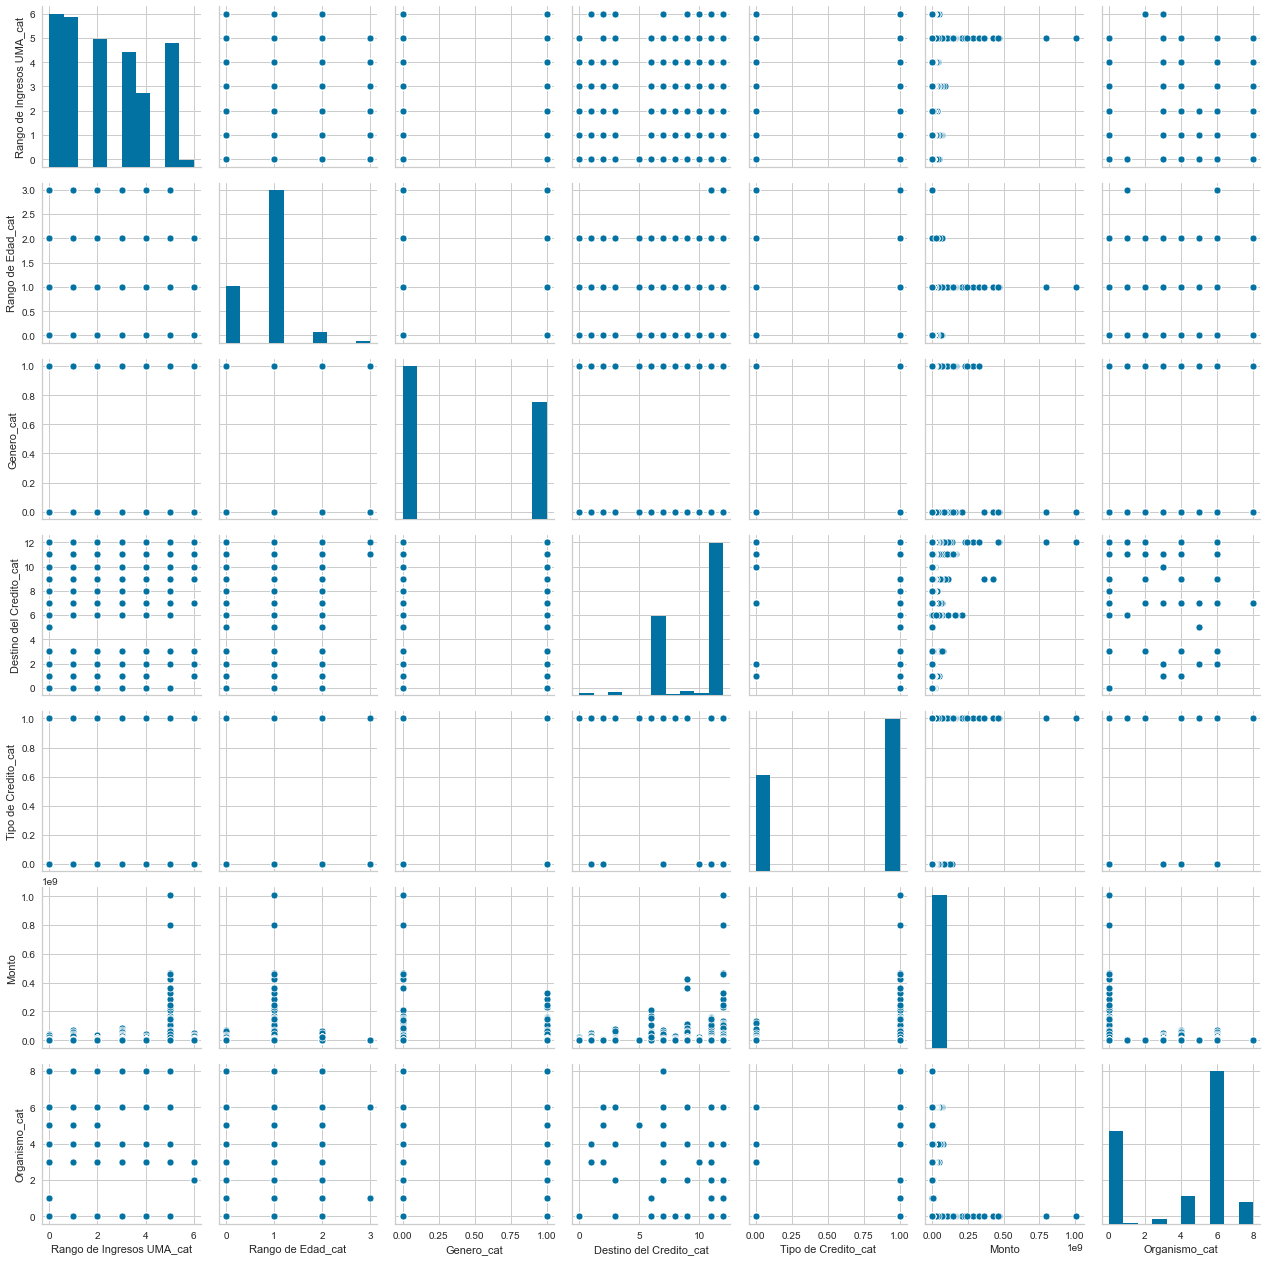

In [15]:
sns.pairplot(df_conavi2020[obj_columns])

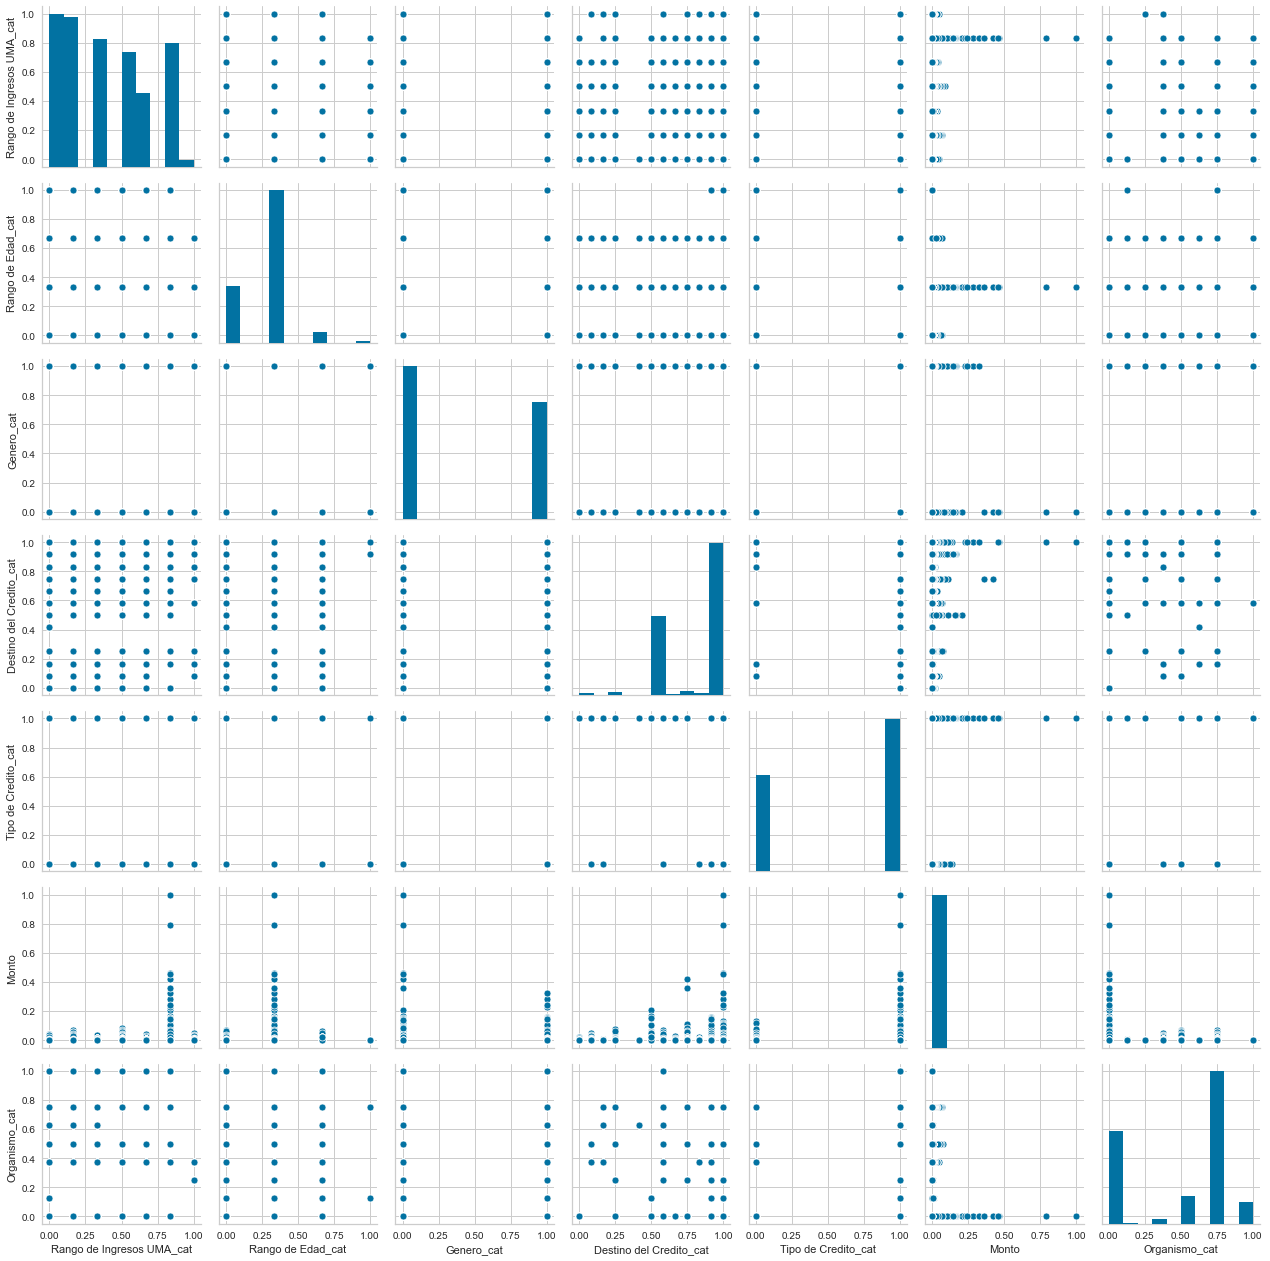

In [16]:
scaler = MinMaxScaler() 
data_conavi2020_scaled=pd.DataFrame(scaler.fit_transform(df_conavi2020[obj_columns]),columns=df_conavi2020[obj_columns].columns)
sns.pairplot(data_conavi2020_scaled)

In [17]:
data_conavi2020_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352689 entries, 0 to 352688
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Rango de Ingresos UMA_cat  352689 non-null  float64
 1   Rango de Edad_cat          352689 non-null  float64
 2   Genero_cat                 352689 non-null  float64
 3   Destino del Credito_cat    352689 non-null  float64
 4   Tipo de Credito_cat        352689 non-null  float64
 5   Monto                      352689 non-null  float64
 6   Organismo_cat              352689 non-null  float64
dtypes: float64(7)
memory usage: 18.8 MB


### Grafica de codo para obtener el numero optimo de clusters 

[[ 2.08810880e+00  8.07440507e-01  4.33672016e-01  9.53451241e+00
   5.74825770e-01  4.69415285e+05  4.28326623e+00]
 [ 4.74587459e+00  9.73597360e-01  4.32343234e-01  1.04818482e+01
   9.76897690e-01  5.70254722e+07  3.20132013e-01]
 [ 5.00000000e+00  1.00000000e+00  0.00000000e+00  1.20000000e+01
   1.00000000e+00  9.05102520e+08  0.00000000e+00]
 [ 3.64012424e+00  8.67570239e-01  4.01524778e-01  1.04866582e+01
   8.55569674e-01  9.25581721e+06  2.35789920e+00]
 [ 5.00000000e+00  1.00000000e+00  3.33333333e-01  1.10000000e+01
   1.00000000e+00  3.87628849e+08  0.00000000e+00]
 [ 4.23071217e+00  9.32492582e-01  4.39169139e-01  1.02284866e+01
   9.08753709e-01  2.44457109e+07  1.11201780e+00]
 [ 3.17677654e+00  8.38893034e-01  4.37409472e-01  1.07140631e+01
   8.09046219e-01  2.91404499e+06  2.89847693e+00]
 [ 5.00000000e+00  1.00000000e+00  4.41176471e-01  1.07500000e+01
   9.55882353e-01  1.18578914e+08 -8.88178420e-16]]


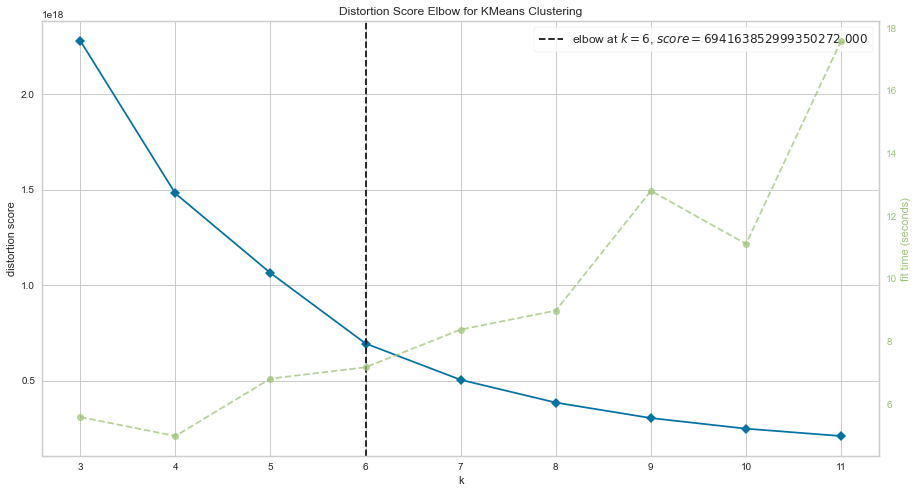

In [18]:
#No scaled
df_conavi2020_clusters= kmeans.fit(df_conavi2020[obj_columns])

print(df_conavi2020_clusters.cluster_centers_)

plt.figure(figsize=(15, 8))

elbow_visualizer = KElbowVisualizer(kmeans, k=(3, 12))

elbow_visualizer.fit(df_conavi2020[obj_columns])
elbow_visualizer.show();

[[ 2.99364586e+00  8.22674769e-01  4.47213581e-01  1.08213846e+01
   7.92121826e-01  1.50614340e+06  3.24230148e+00]
 [ 4.83132530e+00  9.87951807e-01  4.27710843e-01  1.04879518e+01
   9.81927711e-01  6.70018269e+07  2.16867470e-01]
 [ 5.00000000e+00  1.00000000e+00  0.00000000e+00  1.05000000e+01
   1.00000000e+00  4.27133342e+08  0.00000000e+00]
 [ 4.13727960e+00  9.14987406e-01  4.37027708e-01  1.02569270e+01
   8.90428212e-01  1.89407172e+07  1.42569270e+00]
 [ 5.00000000e+00  1.00000000e+00  0.00000000e+00  1.20000000e+01
   1.00000000e+00  9.05102520e+08  0.00000000e+00]
 [ 3.64016586e+00  8.72002884e-01  3.96791058e-01  1.04780963e+01
   8.55597620e-01  9.09316707e+06  2.34252749e+00]
 [ 4.44642857e+00  9.22619048e-01  4.24603175e-01  1.04365079e+01
   9.46428571e-01  3.67723484e+07  7.16269841e-01]
 [ 5.00000000e+00  1.00000000e+00  4.19354839e-01  1.07741935e+01
   9.51612903e-01  1.14761555e+08 -8.88178420e-16]
 [ 1.88287564e+00  8.04508005e-01  4.29956338e-01  9.22071891e+0

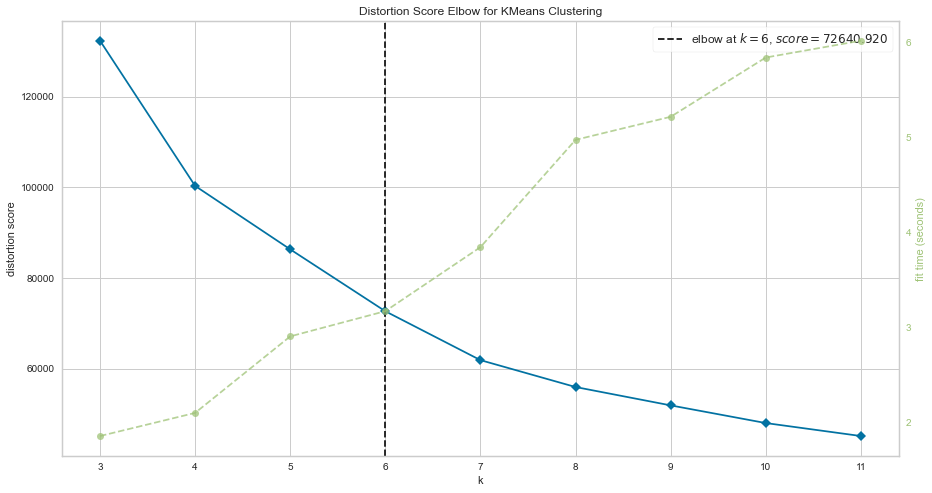

In [19]:
df_conavi2020_clusters_scaled= kmeans_scaled.fit(data_conavi2020_scaled)
#Scaled
print(df_conavi2020_clusters.cluster_centers_)

plt.figure(figsize=(15, 8))

elbow_visualizer = KElbowVisualizer(kmeans_scaled, k=(3, 12))

elbow_visualizer.fit(data_conavi2020_scaled)
elbow_visualizer.show();

## Silohuette sample para identificar clusters

In [22]:
X=data_conavi2020_scaled.sample(n=10000,random_state=1)
X.head()

,Rango de Ingresos UMA_cat,Rango de Edad_cat,Genero_cat,Destino del Credito_cat,Tipo de Credito_cat,Monto,Organismo_cat
13689,0.666667,0.333333,1.0,0.583333,0.0,0.000000,0.75
269929,0.500000,0.333333,0.0,0.916667,0.0,0.000291,0.00
240743,0.833333,0.000000,0.0,0.916667,0.0,0.002217,0.00
269513,0.166667,0.000000,0.0,0.583333,0.0,0.000047,0.00
177399,0.833333,0.333333,0.0,1.000000,0.0,0.001425,0.75


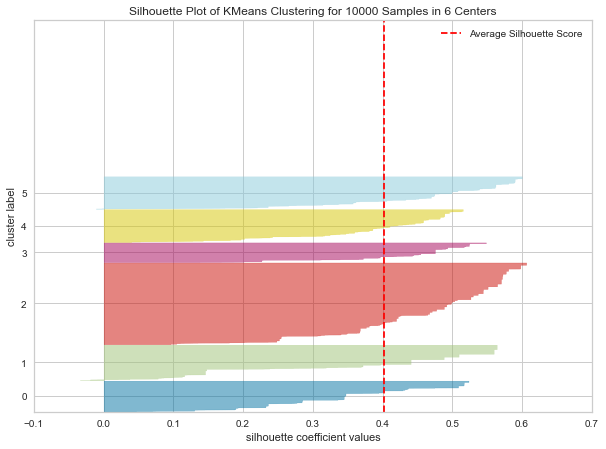

In [23]:
#silohuette sample in kmeans
for idx, n_clusters in enumerate([6]):
    plt.figure(figsize=(10, n_clusters * 1.2))
    
    kmeans_scaled.n_clusters = n_clusters
    silhouette_visualizer = SilhouetteVisualizer(kmeans_scaled, colors='yellowbrick')

    silhouette_visualizer.fit(X);
    silhouette_visualizer.show();

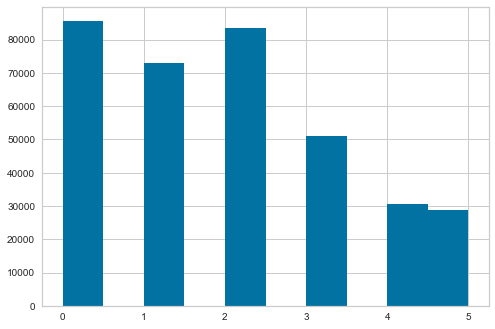

In [24]:
df_conavi2020['Cluster'] = df_conavi2020_clusters_scaled.fit_predict(data_conavi2020_scaled)
data_conavi2020_scaled['Cluster'] = df_conavi2020_clusters_scaled.fit_predict(data_conavi2020_scaled)
df_conavi2020['Cluster'].astype('category')
data_conavi2020_scaled['Cluster'].astype('category')
df_conavi2020['Cluster'].hist()

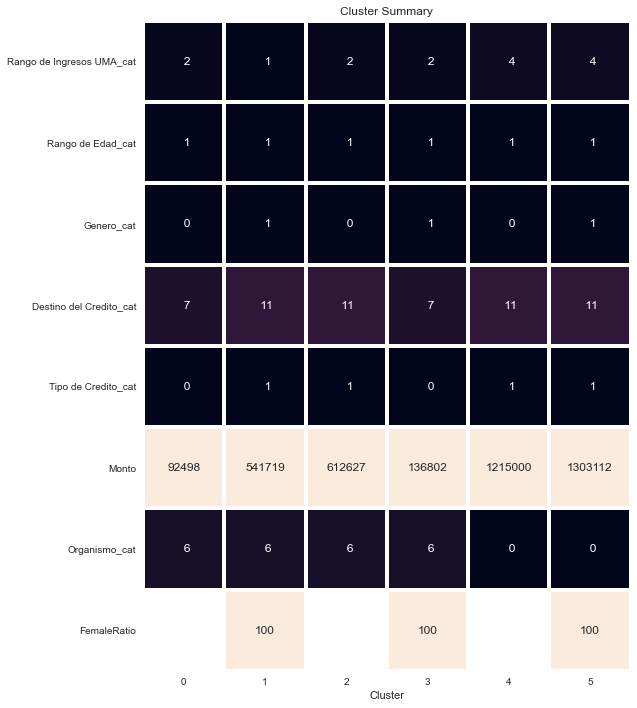

In [25]:
cluster_heatmap_df = df_conavi2020.groupby(['Cluster'])[obj_columns].median()

cluster_heatmap_df['FemaleRatio'] = df_conavi2020[df_conavi2020['Genero'] == 'Mujer'].groupby(['Cluster']).count()['Genero'] / df_conavi2020.groupby(['Cluster']).count()['Genero'] * 100

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

sns.heatmap(cluster_heatmap_df.T, 
    square=True,
    linewidth=3,
    vmax=80, 
    vmin=1,
    cbar=False, 
    annot=True,
    fmt='3.0f',
    ax=ax,
);

ax.set_title('Cluster Summary');
plt.tight_layout()

In [26]:
data_conavi2020_scaled.columns

Index(['Rango de Ingresos UMA_cat', 'Rango de Edad_cat', 'Genero_cat',
       'Destino del Credito_cat', 'Tipo de Credito_cat', 'Monto',
       'Organismo_cat', 'Cluster'],
      dtype='object')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

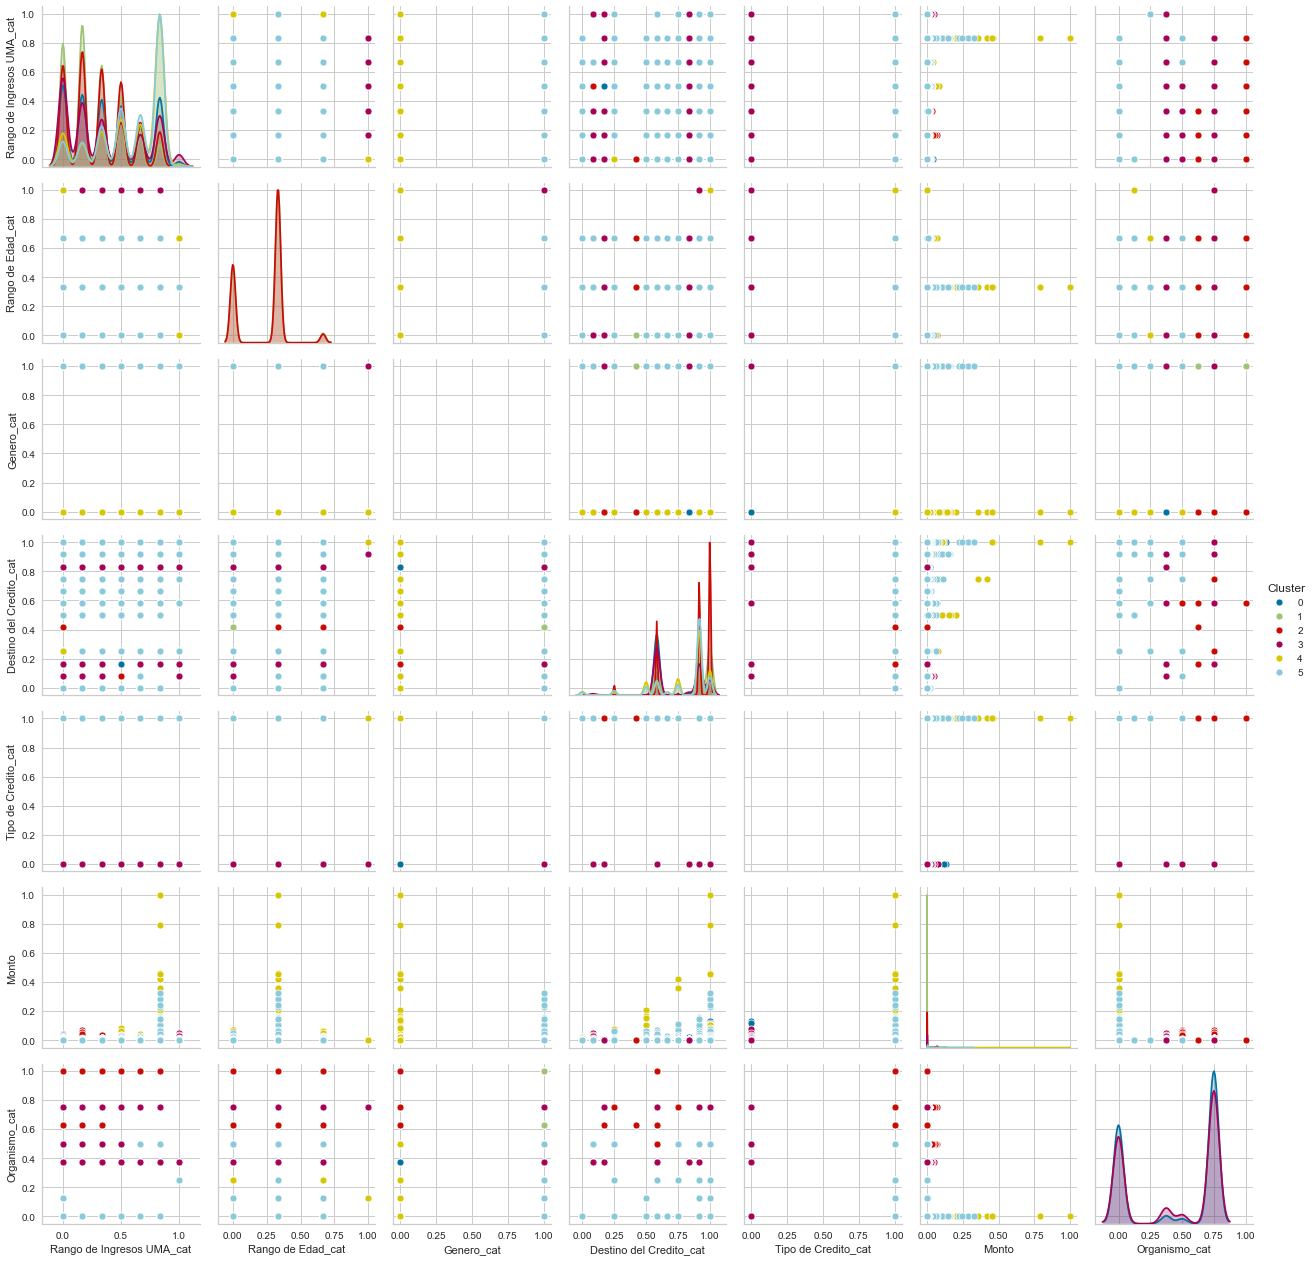

In [27]:
columns=['Rango de Ingresos UMA_cat', 'Rango de Edad_cat', 'Genero_cat',
       'Destino del Credito_cat', 'Tipo de Credito_cat', 'Monto',
       'Organismo_cat']
try:
    sns.pairplot(data_conavi2020_scaled,hue='Cluster')
except RuntimeError as re:
    if str(re).startswith("Selected KDE bandwidth is 0. Cannot estimate density."):
        sns.pairplot(data_conavi2020_scaled, kde_kws={'bw': 0.1})
    else:
        raise re


In [55]:
print(dict(enumerate(df_conavi2020["Organismo"].cat.categories)))
print(dict(enumerate(df_conavi2020["Modalidad"].cat.categories)))
print(dict(enumerate(df_conavi2020["Destino del Credito"].cat.categories)))
print(dict(enumerate(df_conavi2020["Tipo de Credito"].cat.categories)))
print(dict(enumerate(df_conavi2020["Genero"].cat.categories)))
print(dict(enumerate(df_conavi2020["Rango de Edad"].cat.categories)))
print(dict(enumerate(df_conavi2020["Rango de Ingresos UMA"].cat.categories)))
print(dict(enumerate(df_conavi2020["Rango Valor de la Vivienda UMA"].cat.categories)))

{0: 'BANCA (CNBV)', 1: 'BANJERCITO', 2: 'CFE', 3: 'CONAVI', 4: 'FOVISSSTE', 5: 'HABITAT MEXICO', 6: 'INFONAVIT', 7: 'INVI', 8: 'SHF (FONDEO)'}
{0: 'Mejoramientos', 1: 'Otros programas', 2: 'Viviendas nuevas', 3: 'Viviendas usadas'}
{0: 'Adquisición de suelo', 1: 'Ampliación', 2: 'Autoproducción', 3: 'Con disponibilidad de terreno', 4: 'En arrendamiento', 5: 'Insumos para vivienda', 6: 'Liquidez', 7: 'Mejoramientos', 8: 'No especificado', 9: 'Pago de pasivos', 10: 'Reconstrucción', 11: 'Vivienda nueva', 12: 'Vivienda usada'}
{0: 'Cofinanciamientos y subsidios', 1: 'Credito individual'}
{0: 'Hombre', 1: 'Mujer'}
{0: '29 o menos', 1: '30 a 59', 2: '60 o más', 3: 'No disponible'}
{0: '2.6 o menos', 1: '2.61 a 4.00', 2: '4.01 a 6.00', 3: '6.01 a 9.00', 4: '9.01 a 12.00', 5: 'Más de 12', 6: 'No disponible'}
{0: 'Económica', 1: 'Media', 2: 'No disponible', 3: 'Popular', 4: 'Residencial', 5: 'Residencial plus', 6: 'Tradicional'}


In [107]:
obj_columns=['Rango de Ingresos UMA_cat','Rango de Edad_cat','Genero_cat','Destino del Credito_cat','Tipo de Credito_cat','Monto','Organismo_cat']
cluster=5
df_conavi2020[df_conavi2020.Cluster ==cluster]['Genero'].value_counts()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Rango de Ingresos UMA'].value_counts()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Rango de Edad'].value_counts()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Destino del Credito'].value_counts()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Tipo de Credito'].value_counts()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Monto'].median()
df_conavi2020[df_conavi2020.Cluster ==cluster]['Organismo'].value_counts()


BANCA (CNBV)      28448
FOVISSSTE           259
BANJERCITO          102
CFE                  77
SHF (FONDEO)          0
INVI                  0
INFONAVIT             0
HABITAT MEXICO        0
CONAVI                0
Name: Organismo, dtype: int64

In [ ]:
kmean_model=KMeans()
X=df_conavi2020[obj_columns]
kmean_model.n_clusters = 6
kmean_model.fit(X)

kmean_clusters = kmean_model.labels_
kmean_centroids = kmean_model.cluster_centers_

plt.figure(figsize=(15, 8))

sns.scatterplot(data=X, x='Genero_cat', y='Rango de Ingresos UMA_cat', hue=kmean_clusters, palette='muted');
sns.scatterplot(x=kmean_centroids[:, 3], y=kmean_centroids[:, 4], color='black', s=300, alpha=0.5);

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X,
    x='Genero_cat', 
    y='Rango de Ingresos UMA_cat', 
    z='Monto', 
    color=kmean_clusters.astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib inline

#Gaussian Mixture Model
gmm = GaussianMixture(n_components=6)
gmm.fit(X)
proba_lists = gmm.predict_proba(X)
#kmean_clusters = gmm.labels_
#kmean_centroids = gmm.cluster_centers_
df_conavi2020['Cluster2'] =gmm.fit(X).fit_predict(df_conavi2020[conavi_columns])

In [ ]:
import plotly.express as px

fig = px.scatter_3d(
    X,
    x='Genero_cat', 
    y='Rango de Ingresos UMA_cat', 
    z='Monto', 
    color=df_conavi2020['Cluster2'].astype(str),
    opacity=0.8,
    height=700,
    width=700,
    title='Clusters in Age-SpendingScore-Income space',
    color_discrete_sequence=px.colors.qualitative.Set2
)
fig.show()

In [ ]:
print(proba_lists)
gmm.labels

In [ ]:
#Plotting
colored_arrays = np.matrix(proba_lists)
colored_tuples = [tuple(i.tolist()[0]) for i in colored_arrays]
fig = plt.figure(1, figsize=(7,7))
ax = Axes3D(fig, rect=[0, 0, 0.95, 1], elev=48, azim=134)
ax.scatter(X['Monto'], X['Genero_cat'], X['Genero_cat'],
          c=colored_tuples, edgecolor="k", s=50)
ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
plt.title("Gaussian Mixture Model", fontsize=14)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
df_conavi2020_sample = df_conavi2020[obj_columns].sample(n=10)
hier_clust = AgglomerativeClustering(linkage='ward')
df_conavi2020_hier = hier_clust.fit(df_conavi2020_sample)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
 
def plot_dendrogram(model, **kwargs):
    # Children of hierarchical clustering
    children = model.children_
    # Distances between each pair of children
    # Since we don't have this information, we can use a uniform one for plotting
    distance = np.arange(children.shape[0])
    # The number of observations contained in each cluster level
    no_of_observations = np.arange(2, children.shape[0]+2)
    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack([children, distance, no_of_observations]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    


In [ ]:
plot_dendrogram(df_conavi2020_hier,leaf_rotation=90,
           leaf_font_size=6)

In [ ]:
from sklearn.metrics import silhouette_score
score_kmeans = silhouette_score(X, kmean_clusters, metric='euclidean')
score_gmm=silhouette_score(X, proba_lists, metric='euclidean')

In [ ]:
#print(score_kmeans)
#print(score_gmm)

from sklearn.manifold import TSNE
 
#X,df_conavi2020['Cluster1']  = datasets.load_iris(return_X_y=True)
y =df_conavi2020['Cluster2']
fig, ax = plt.subplots(1, 4, figsize=(15, 7))
for i, perp in enumerate([5, 30, 50, 100]):
    tsne = TSNE(perplexity=perp)
    x_embedded = tsne.fit_transform(X)
    ax[i].scatter(x_embedded[:, 0], x_embedded[:, 1], c=y)
    ax[i].set_title("Perplexity = {}".format(perp))
    
plt.show()

In [ ]:
df_conavi2020.groupby(by="Genero").count()